**QUESTION 1**

# **part (a)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

data = []

def getRandomY(x):
  y = math.sin(math.pi * 2 * x)
  noise = np.random.normal(0, 0.3) # generating a random noise with a gaussian distribution having standard deviation of 0.3 and mean of 0
  y += noise
  return y


for i in range(0,10):
  random.seed(i)
  x = random.uniform(0,1)
  y = getRandomY(x)
  data.append([x,y])

# printing the 10 instances of random (x,y) pair
print(data)


[[0.8444218515250481, -0.9037037735752903], [0.13436424411240122, 1.2340191469260693], [0.9560342718892494, -0.33502162235327443], [0.23796462709189137, 0.9656857057583119], [0.23604808973743452, 1.1550507212822914], [0.6229016948897019, -0.4584912767983055], [0.793340083761663, -1.026361626286349], [0.32383276483316237, 0.5614946417306356], [0.2267058593810488, 0.9029787640036606], [0.46300735781502145, 0.07904994121809891]]


# **Part (b)**

In [ ]:
test_set = []
training_set = []

index = [x for x in range(0,len(data))]
temp = random.sample(index, int(0.8 * len(data)))
training_set = [data[i] for i in temp]

#getting the set difference of the list to get the list of remaining indices after random sampling
test_set = [data[i] for i in list(set(index) - set(temp))]

# **Part (c)**

In [ ]:
from sklearn import metrics

learning_rate = 0.05

def getLossDifferentiation(parameters, training_set):
  lossFuncDifferentiation = []
  for i in range(len(parameters)):
    sum = 0
    for j in range(len(training_set)):
      polynomial = 0
      for k in range(len(parameters)):
        polynomial += parameters[k] * training_set[j][0] ** k
      polynomial -= training_set[j][1]
      polynomial *= training_set[j][0] ** i
      sum += polynomial
    lossFuncDifferentiation.append(sum / len(training_set))
  
  return lossFuncDifferentiation


def getNewParameterVal(parameters, learning_rate, training_set):
  lossDifferentiation = getLossDifferentiation(parameters, training_set)
  for i in range(len(parameters)):
    parameters[i] -= learning_rate * lossDifferentiation[i]
  

def getMAE(parameters, dataSet):
  pred = []
  actual = []
  for i in range(len(dataSet)):
    sum = 0
    for j in range(len(parameters)):
      sum += parameters[j] * dataSet[i][0] ** j
    pred.append(sum)
    actual.append(dataSet[i][1])
  
  MAE = metrics.mean_absolute_error(actual,pred)
  return MAE

def getMSE(parameters, dataSet):
  pred = []
  actual = []
  for i in range(len(dataSet)):
    sum = 0
    for j in range(len(parameters)):
      sum += parameters[j] * dataSet[i][0] ** j
      pred.append(sum)
      actual.append(dataSet[i][1])
  MSE = metrics.mean_squared_error(actual, pred)
  return MSE

# function for slow gradient descent and thus higher accuracy
def train(parameters, learning_rate, training_set):
  prev_MAE, MAE = 100000, 0
  while (True):
    getNewParameterVal(parameters, learning_rate, training_set)
    #print('Parameters:')
    #print(parameters)

    #print("\nMAE: ")
    MAE = getMAE(parameters, training_set)
    #print(MAE)

    if (prev_MAE < MAE): break
    if (prev_MAE - MAE < 10 ** -8): break
    prev_MAE = MAE

  print("\nFinal training MAE:")
  print(MAE)


# main loop to run training function for curves from degree 1 to 9.
trained_parameters = []
for n in range(1, 10):
  parameters = [0] * (n+1)
  print('\nn = %d' % (n))
  # start training for curve of degree n
  train(parameters, learning_rate, training_set)
  trained_parameters.append(parameters)





n = 1

Final training MAE:
0.2555921273475198

n = 2

Final training MAE:
0.15096740004151915

n = 3

Final training MAE:
0.08030860587870586

n = 4

Final training MAE:
0.09400332837066702

n = 5

Final training MAE:
0.07887662461429332

n = 6

Final training MAE:
0.06314044297055472

n = 7

Final training MAE:
0.06038806620503986

n = 8

Final training MAE:
0.05487349898763383

n = 9

Final training MAE:
0.056704332118949353


In [ ]:
# show test MSE for each degree of curves

print("Test Error on test data")
for parameters in trained_parameters:
  print("\n n = %d" %(len(parameters) - 1))
  print('Test Dataset MSE (mean square error):')
  print(getMSE(parameters, test_set))


Test Error on test data

 n = 1
Test Dataset MSE (mean square error):
1.6970545946598294

 n = 2
Test Dataset MSE (mean square error):
2.3075401315684263

 n = 3
Test Dataset MSE (mean square error):
5.600911844978772

 n = 4
Test Dataset MSE (mean square error):
1.0725572308973639

 n = 5
Test Dataset MSE (mean square error):
0.8329541464784956

 n = 6
Test Dataset MSE (mean square error):
0.7582319639818055

 n = 7
Test Dataset MSE (mean square error):
0.6126721644558046

 n = 8
Test Dataset MSE (mean square error):
0.5158966830565872

 n = 9
Test Dataset MSE (mean square error):
0.43843321537958485


# **QUESTION 2**

# **Part (a)**

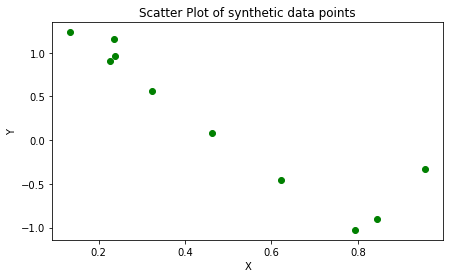

In [ ]:
import matplotlib.pyplot as plt

temp = np.transpose(data)

fid = plt.figure(figsize=(7, 4))
plt.scatter(temp[0], temp[1], color = 'green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of synthetic data points')
plt.show()

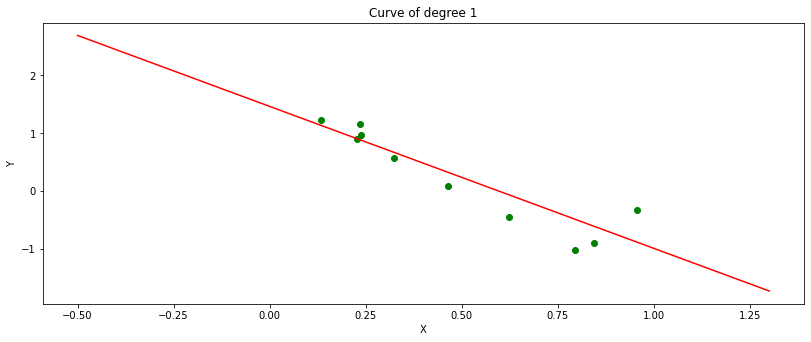

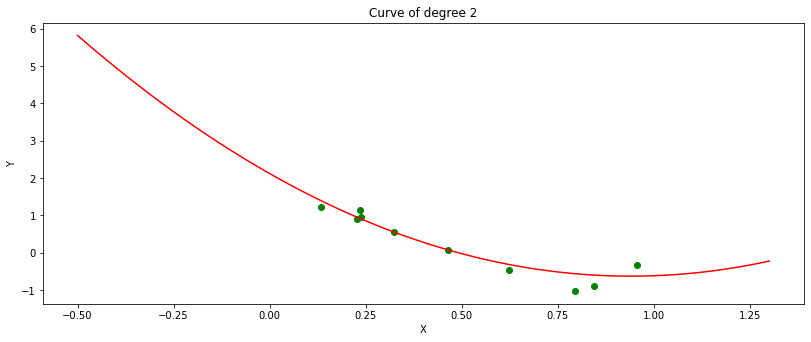

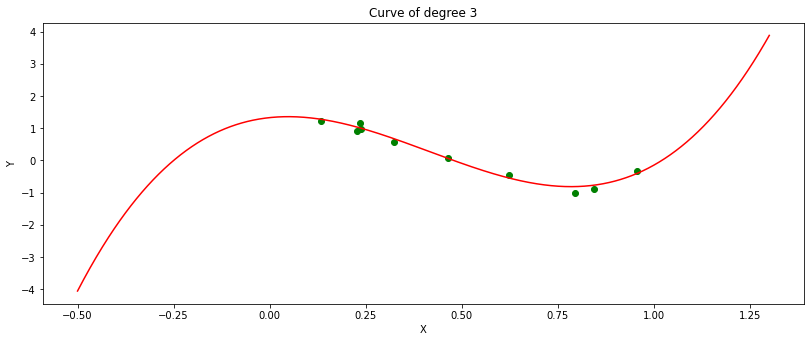

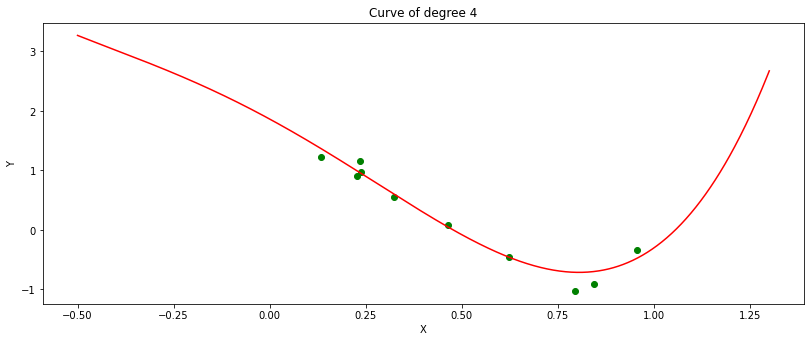

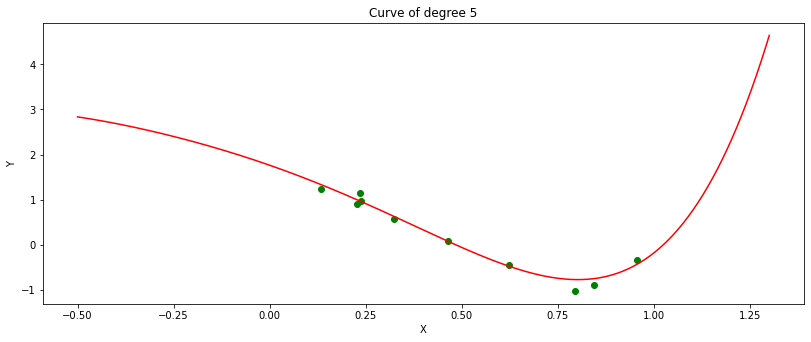

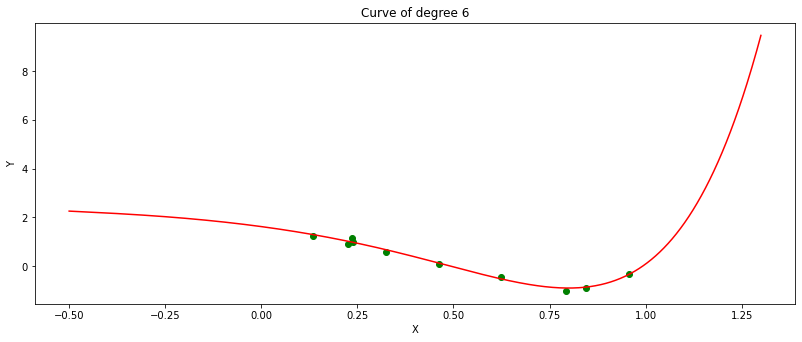

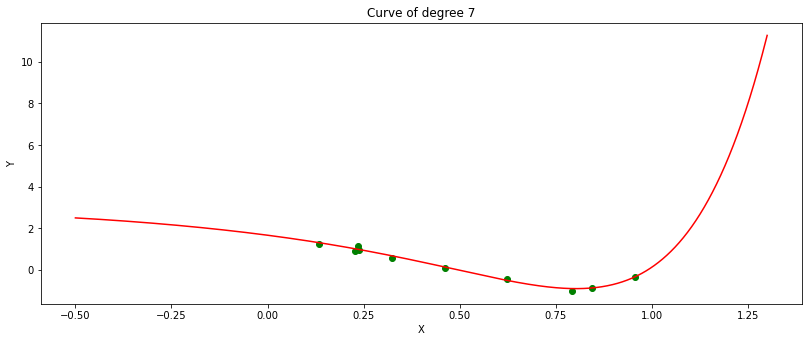

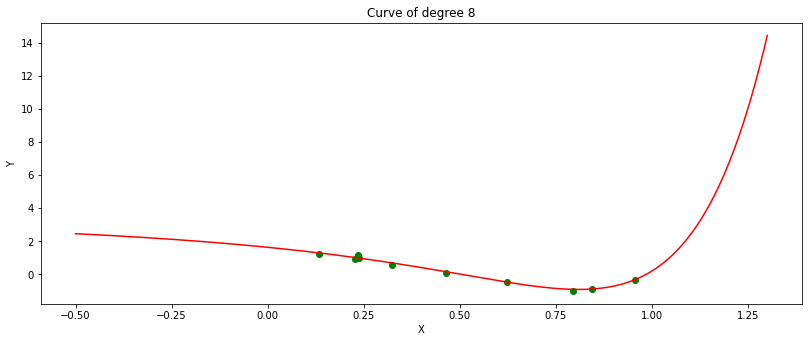

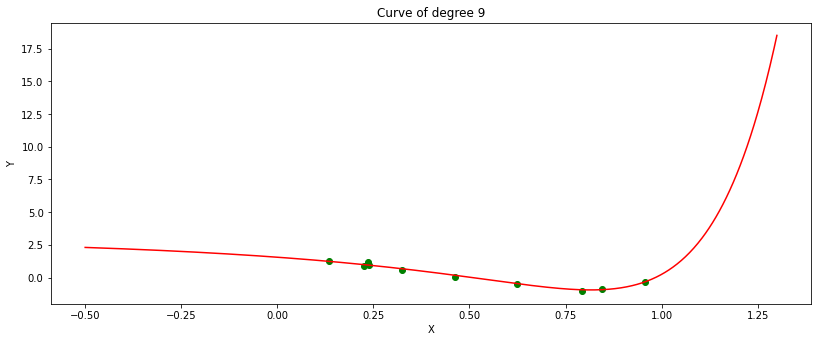

In [ ]:
def getPolyFunctionVal(cofficients, x):
  y = []
  for val in x:
    sum = 0
    for i in range(len(cofficients)):
      sum += cofficients[i] * val ** i
    y.append(sum)
  return y


# scale of plots will be different due to different y values generated by polynomial for same x

Xval = np.linspace(-0.5, 1.3, 1000)

for i in range(len(trained_parameters)):
  fig = plt.figure(figsize=(30,30))

  plt.subplot(5,2,i+1)
  plt.scatter(temp[0], temp[1], color = 'green')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Curve of degree %d' %(i+1))
  Yval = getPolyFunctionVal(trained_parameters[i], Xval)
  plt.plot(Xval, Yval, color = 'red')



# **Part (b)**

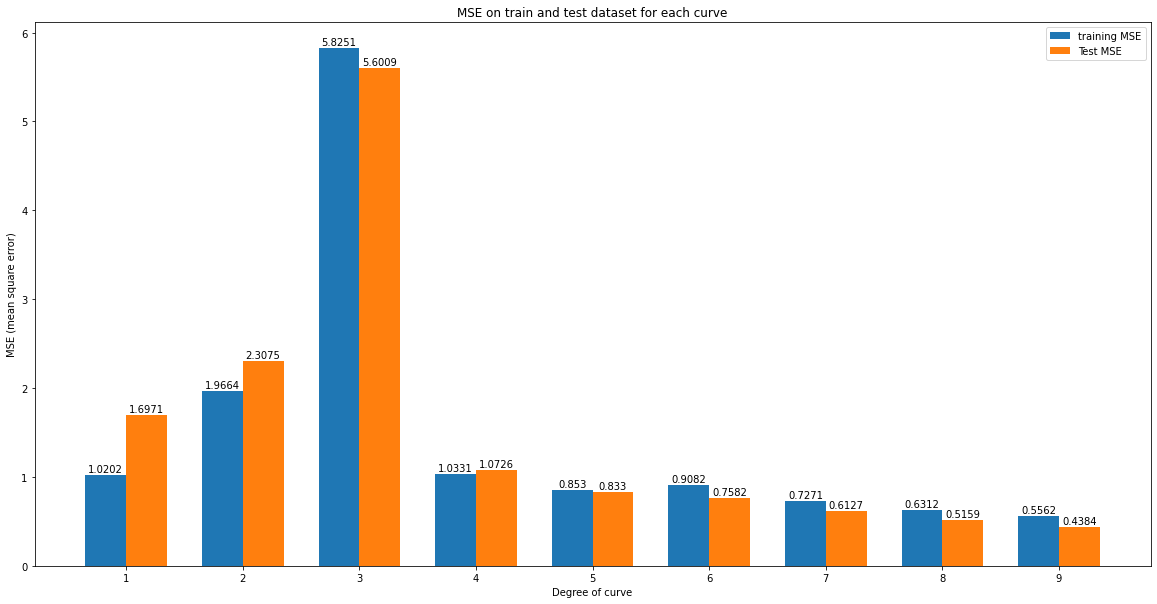

In [ ]:
trainMSE, testMSE = [], []

for parameters in trained_parameters:
  trainMSE.append(getMSE(parameters, training_set))
  testMSE.append(getMSE(parameters, test_set))

width = 0.35    # width of each bar 
degree = np.arange(1, 10)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

trainBar = ax.bar(degree - width/2, trainMSE, width, label='training MSE')
testBar = ax.bar(degree + width/2, testMSE, width, label = 'Test MSE')

ax.set_title('MSE on train and test dataset for each curve')
ax.set_ylabel('MSE (mean square error)')
ax.set_xlabel('Degree of curve')
ax.set_xticks(degree)
ax.set_xticklabels([str(i) for i in degree])
ax.legend()

for i in range(len(trainBar)):
  height_train = round(trainBar[i].get_height(), 4)
  height_test = round(testBar[i].get_height(), 4)
  ax.annotate('{}'.format(height_train),
              xy = (trainBar[i].get_x() + trainBar[i].get_width() / 2, height_train),
              xytext = (0, 1),
              textcoords = "offset points",
              ha = 'center', va = 'bottom')
  
  ax.annotate('{}'.format(height_test),
              xy = (testBar[i].get_x() + testBar[i].get_width() / 2, height_test),
              xytext = (0, 1),
              textcoords = "offset points",
              ha = 'center', va = 'bottom')


plt.show()
  

On the basis of the above MSE (mean square error) for each curve, curve with n = 9 or degree 9 is the best fitted curve for the synthetic dataset that was generated above. This is because curve of degree 9 has the lowest MSE for both training dataset and testing dataset among all the curves from degree 1 to 9.
The same observation can be seen for MAE (mean absolute error) metrics on the training dataset.

# **Question 3**

In [ ]:
# defining a faster training function with more upper limit for termination of gradient descent --> less accuracy curve generated

# function for fast and less stricter limit for gradient descent and thus reduced accuracy
def trainFast(parameters, learning_rate, training_set):
  prev_MAE, MAE = 100000, 0
  while (True):
    getNewParameterVal(parameters, learning_rate, training_set)
    #print('Parameters:')
    #print(parameters)

    #print("\nMAE: ")
    MAE = getMAE(parameters, training_set)
    #print(MAE)

    if (prev_MAE < MAE): break
    if (prev_MAE - MAE < 10 ** -5): break
    prev_MAE = MAE

  print("\nFinal training MAE:")
  print(MAE)

In [ ]:
import matplotlib.pyplot as plt

def visualDataSet(data):
  temp = np.transpose(data)

  fid = plt.figure(figsize=(7, 4))
  plt.scatter(temp[0], temp[1], color = 'green')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Scatter Plot of synthetic data points')
  plt.show()

**For 10 instances**

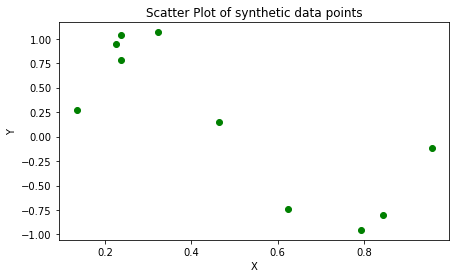


n = 1

Final training MAE:
0.4204564521856782

n = 2

Final training MAE:
0.4351545052657917

n = 3

Final training MAE:
0.39786652201032335

n = 4

Final training MAE:
0.36698276962602006

n = 5

Final training MAE:
0.3213216188200999

n = 6

Final training MAE:
0.28609851897535366

n = 7

Final training MAE:
0.26052633759279575

n = 8

Final training MAE:
0.24309361660477322

n = 9

Final training MAE:
0.2438258662156471


In [ ]:
data_10 = []

for i in range(10):
  random.seed(i)
  x = random.uniform(0,1)
  y = getRandomY(x)
  data_10.append([x,y])

# visualising the dataset
visualDataSet(data_10)

# generating the testing and training dataset
test_set = []
training_set = []

index = [x for x in range(0,len(data_10))]
temp = random.sample(index, int(0.8 * len(data_10)))
training_set = [data_10[i] for i in temp]

#getting the set difference of the list to get the list of remaining indices after random sampling
test_set = [data_10[i] for i in list(set(index) - set(temp))]

# training the 9 curves on the above dataset
trained_parameters_10 = []
for n in range(1, 10):
  parameters = [0] * (n+1)
  print('\nn = %d' % (n))

  # start training for curve of degree n
  trainFast(parameters, learning_rate, training_set)
  trained_parameters_10.append(parameters)


# getting the MAE for training and test Dataset for each curve
training_MAE_10 = []
testing_MAE_10 = []

# generating list of MAE for each curve for each of the training and the testing dataset
for parameters in trained_parameters_10:
  training_MAE_10.append(getMAE(parameters, training_set))
  testing_MAE_10.append(getMAE(parameters, test_set))

**For 100 instances**

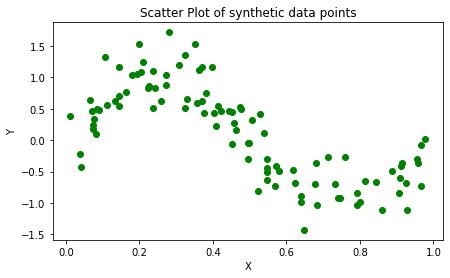


n = 1

Final training MAE:
0.429008931537575

n = 2

Final training MAE:
0.412056914391428

n = 3

Final training MAE:
0.4123177908438362

n = 4

Final training MAE:
0.41556323293715175

n = 5

Final training MAE:
0.40917446017810366

n = 6

Final training MAE:
0.3901235122599916

n = 7

Final training MAE:
0.3834496061139189

n = 8

Final training MAE:
0.3805066024818344

n = 9

Final training MAE:
0.374644364593762


In [ ]:
data_100 = []

for i in range(100):
  random.seed(i)
  x = random.uniform(0,1)
  y = getRandomY(x)
  data_100.append([x,y])

# visualising the dataset
visualDataSet(data_100)

# generating the testing and training dataset
test_set = []
training_set = []

index = [x for x in range(0,len(data_100))]
temp = random.sample(index, int(0.8 * len(data_100)))
training_set = [data_100[i] for i in temp]

#getting the set difference of the list to get the list of remaining indices after random sampling
test_set = [data_100[i] for i in list(set(index) - set(temp))]

# training the 9 curves on the above dataset
trained_parameters_100 = []
for n in range(1, 10):
  parameters = [0] * (n+1)
  print('\nn = %d' % (n))

  # start training for curve of degree n
  trainFast(parameters, learning_rate, training_set)
  trained_parameters_100.append(parameters)


# getting the MAE for training and test Dataset for each curve
training_MAE_100 = []
testing_MAE_100 = []

# generating list of MAE for each curve for each of the training and the testing dataset
for parameters in trained_parameters_100:
  training_MAE_100.append(getMAE(parameters, training_set))
  testing_MAE_100.append(getMAE(parameters, test_set))

**For 1000 instances**

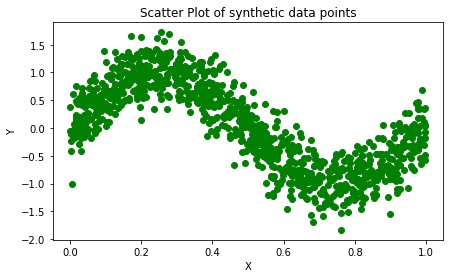


n = 1

Final training MAE:
0.45588568506630617

n = 2

Final training MAE:
0.4554058507607226

n = 3

Final training MAE:
0.458370900570809

n = 4

Final training MAE:
0.4274266033447617

n = 5

Final training MAE:
0.3976078720409151

n = 6

Final training MAE:
0.3752270670628415

n = 7

Final training MAE:
0.36440848289589234

n = 8

Final training MAE:
0.35843053470479214

n = 9

Final training MAE:
0.3573196625488642


In [ ]:
data_1000 = []

for i in range(1000):
  random.seed(i)
  x = random.uniform(0,1)
  y = getRandomY(x)
  data_1000.append([x,y])

# visualising the dataset
visualDataSet(data_1000)

# generating the testing and training dataset
test_set = []
training_set = []

index = [x for x in range(0,len(data_1000))]
temp = random.sample(index, int(0.8 * len(data_1000)))
training_set = [data_1000[i] for i in temp]

#getting the set difference of the list to get the list of remaining indices after random sampling
test_set = [data_1000[i] for i in list(set(index) - set(temp))]


# training the 9 curves on the above dataset
trained_parameters_1000 = []
for n in range(1, 10):
  parameters = [0] * (n+1)
  print('\nn = %d' % (n))

  # start training for curve of degree n
  trainFast(parameters, learning_rate, training_set)
  trained_parameters_1000.append(parameters)


# getting the MAE for training and test Dataset for each curve
training_MAE_1000 = []
testing_MAE_1000 = []

# generating list of MAE for each curve for each of the training and the testing dataset
for parameters in trained_parameters_1000:
  training_MAE_1000.append(getMAE(parameters, training_set))
  testing_MAE_1000.append(getMAE(parameters, test_set))

**For 10000 instances**

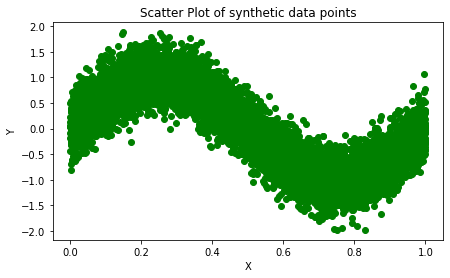


n = 1

Final training MAE:
0.4478866393688244

n = 2

Final training MAE:
0.4486317865418008

n = 3

Final training MAE:
0.45135199676022825

n = 4

Final training MAE:
0.41977857870597296

n = 5

Final training MAE:
0.3887987941199733

n = 6

Final training MAE:
0.36617822506231185

n = 7

Final training MAE:
0.35468394859723745

n = 8

Final training MAE:
0.3495545452173625

n = 9

Final training MAE:
0.34825364999030706


In [ ]:
data_10000 = []

for i in range(10000):
  random.seed(i)
  x = random.uniform(0,1)
  y = getRandomY(x)
  data_10000.append([x,y])

# visualising the dataset
visualDataSet(data_10000)

# generating the testing and training dataset
test_set = []
training_set = []

index = [x for x in range(0,len(data_10000))]
temp = random.sample(index, int(0.8 * len(data_10000)))
training_set = [data_10000[i] for i in temp]

#getting the set difference of the list to get the list of remaining indices after random sampling
test_set = [data_10000[i] for i in list(set(index) - set(temp))]

# training the 9 curves on the above dataset
trained_parameters_10000 = []
for n in range(1, 10):
  parameters = [0] * (n+1)
  print('\nn = %d' % (n))

  # start training for curve of degree n
  trainFast(parameters, learning_rate, training_set)
  trained_parameters_10000.append(parameters)


# getting the MAE for training and test Dataset for each curve
training_MAE_10000 = []
testing_MAE_10000 = []

# generating list of MAE for each curve for each of the training and the testing dataset
for parameters in trained_parameters_10000:
  training_MAE_10000.append(getMAE(parameters, training_set))
  testing_MAE_10000.append(getMAE(parameters, test_set))

[10, 100, 1000, 10000]


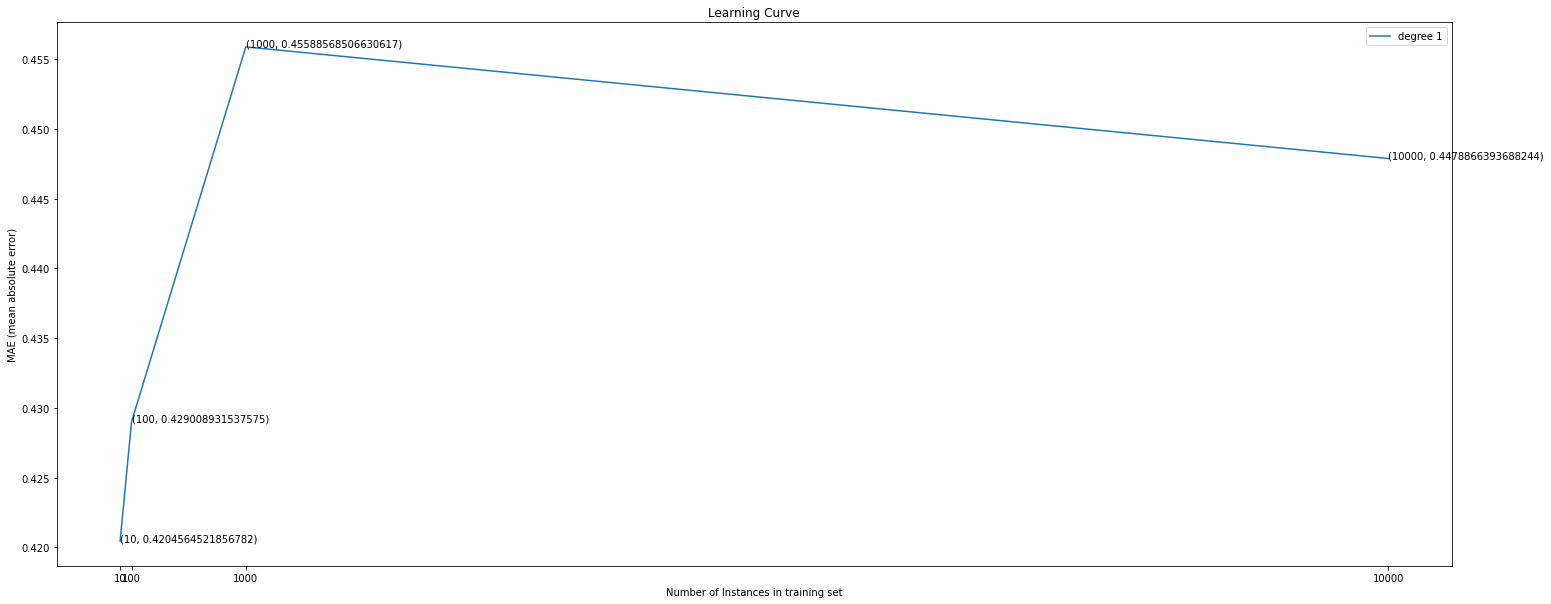

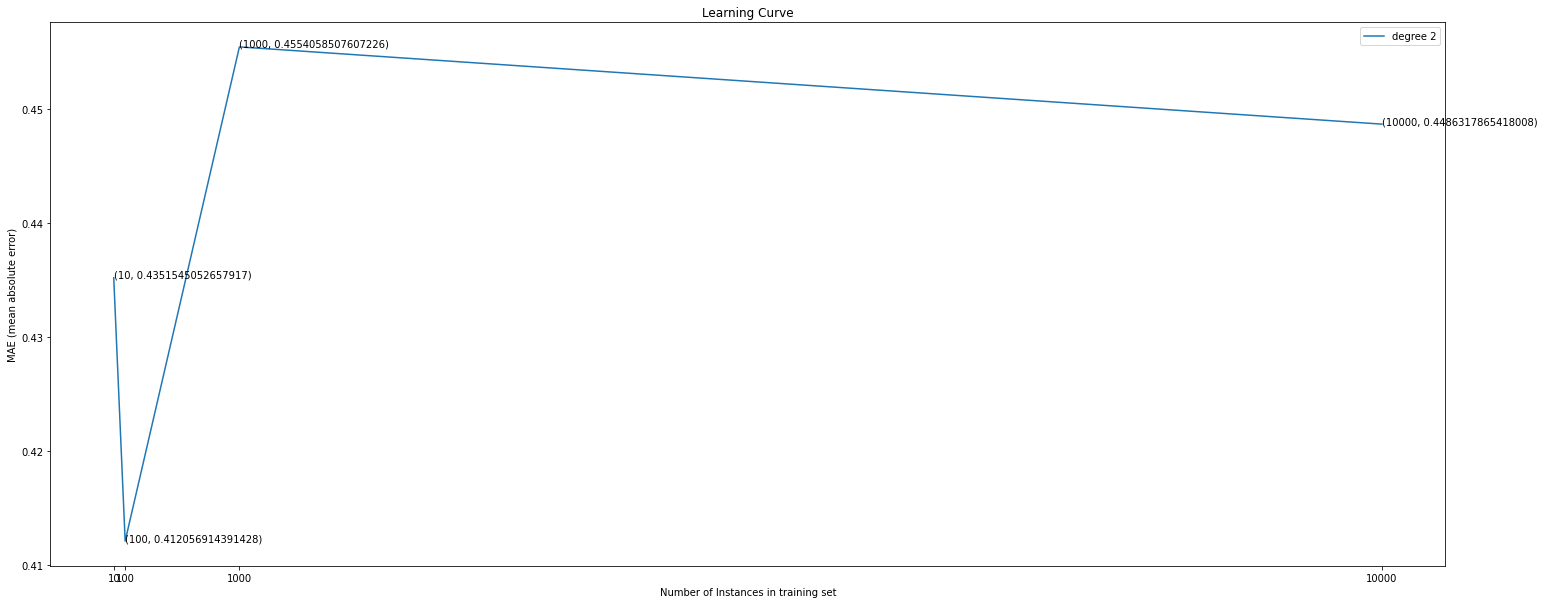

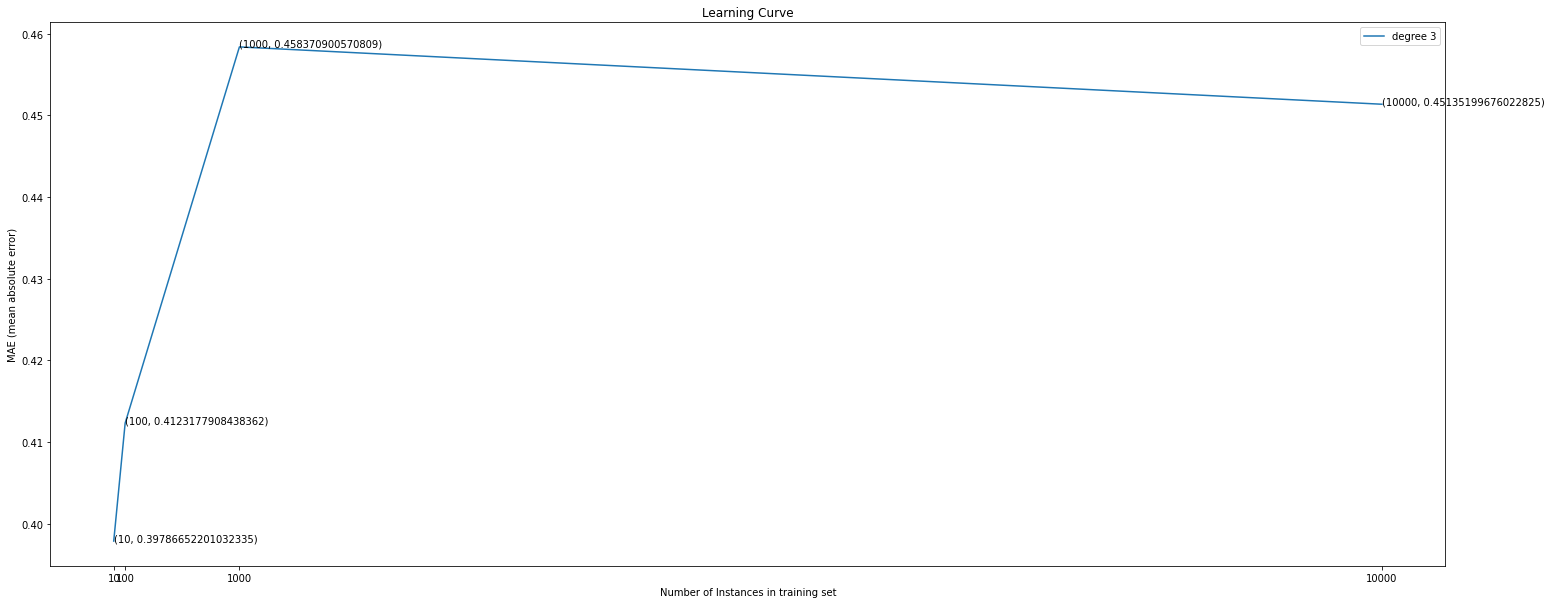

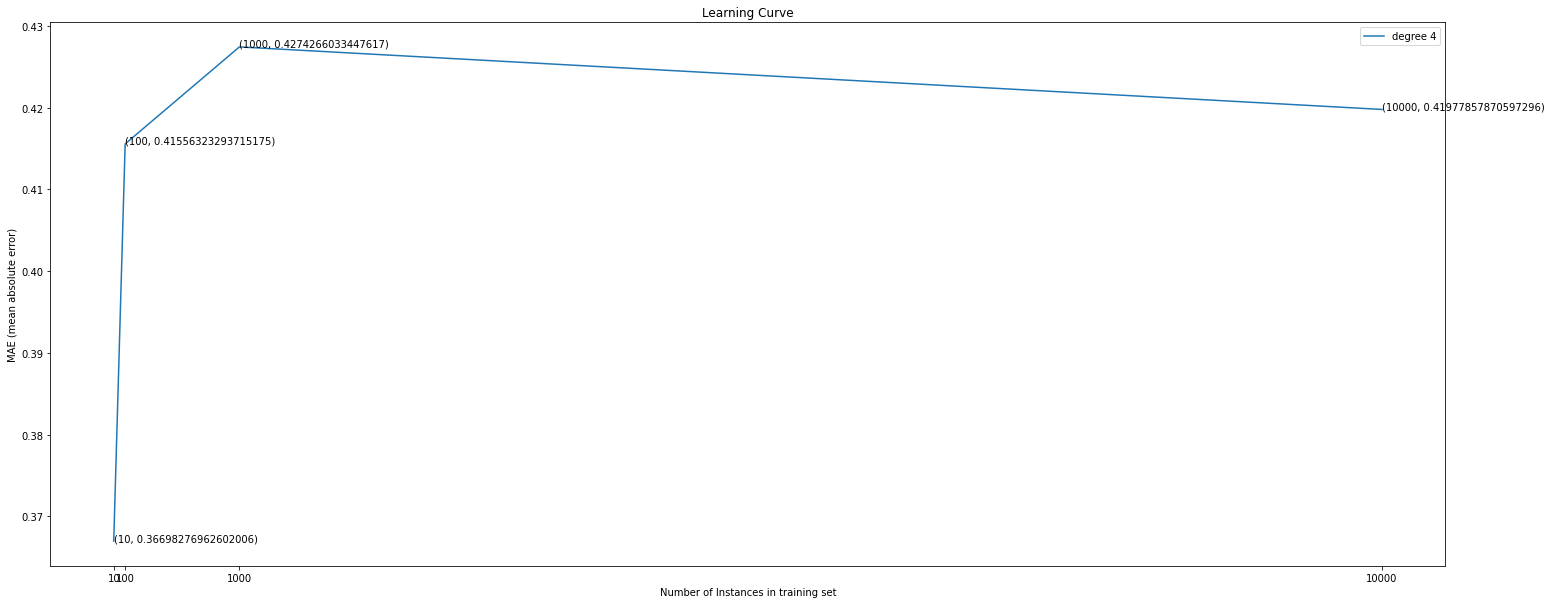

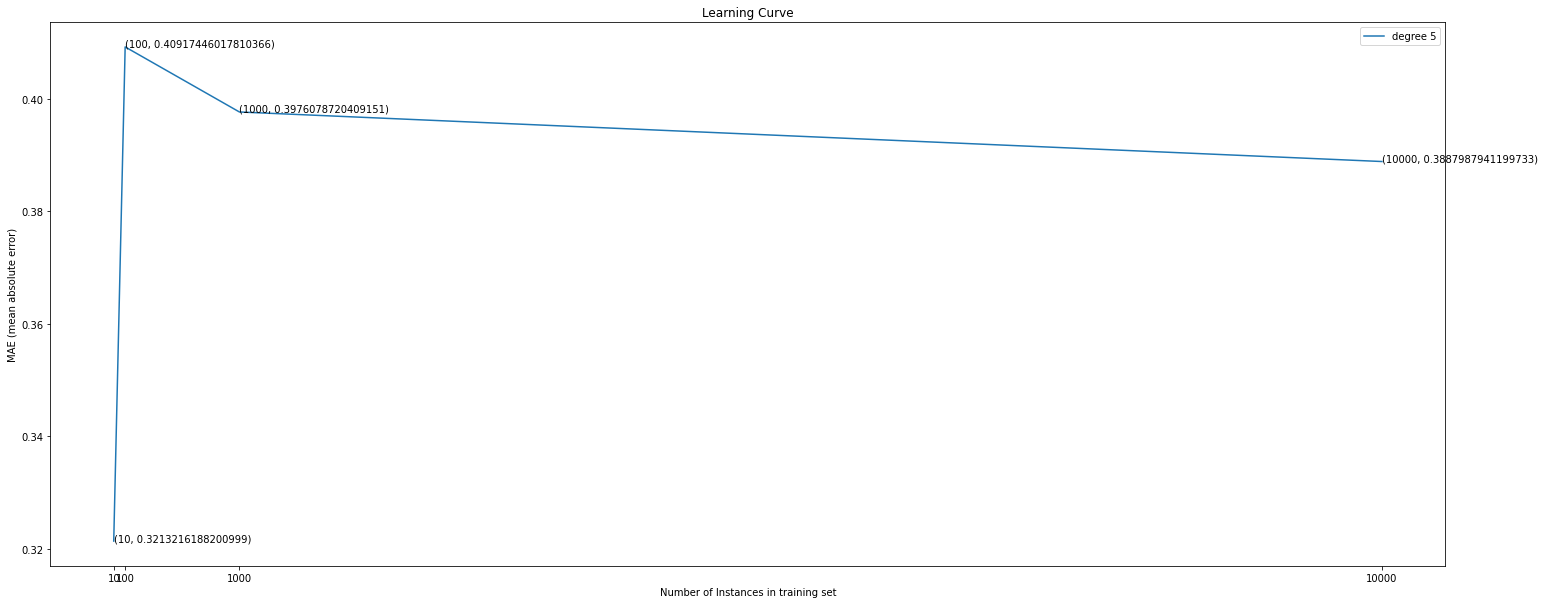

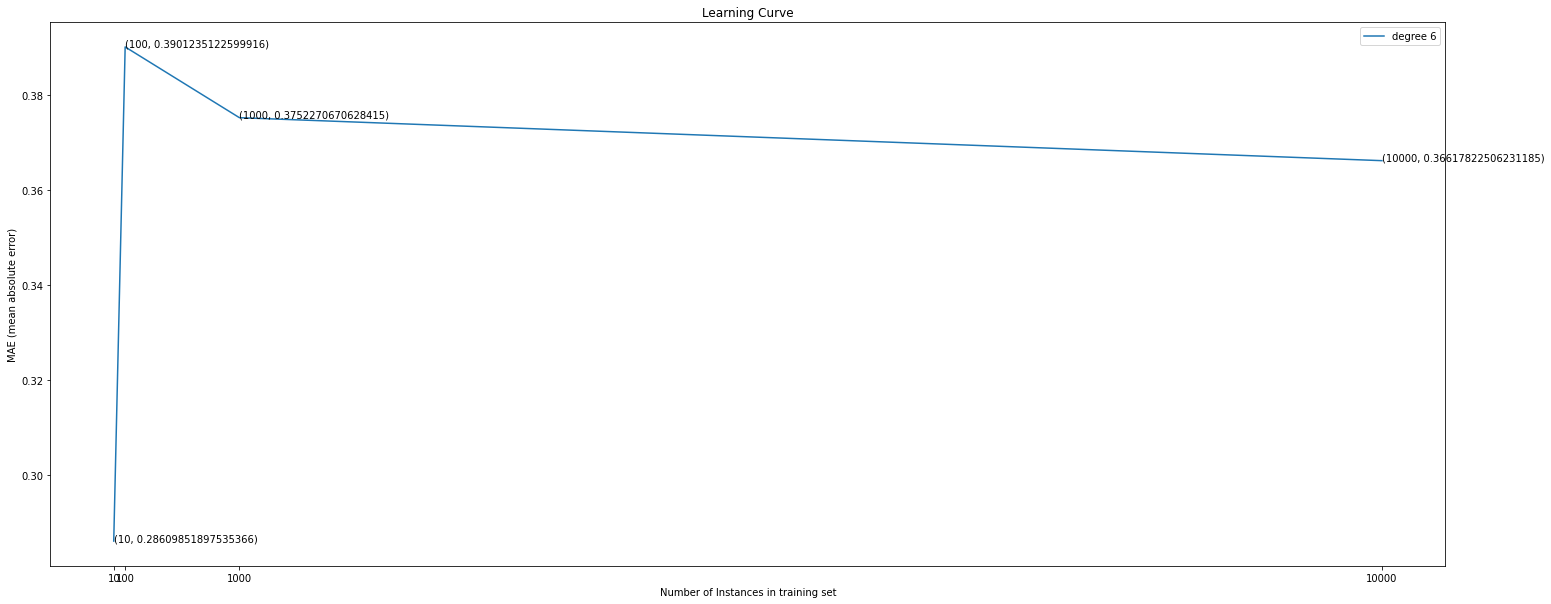

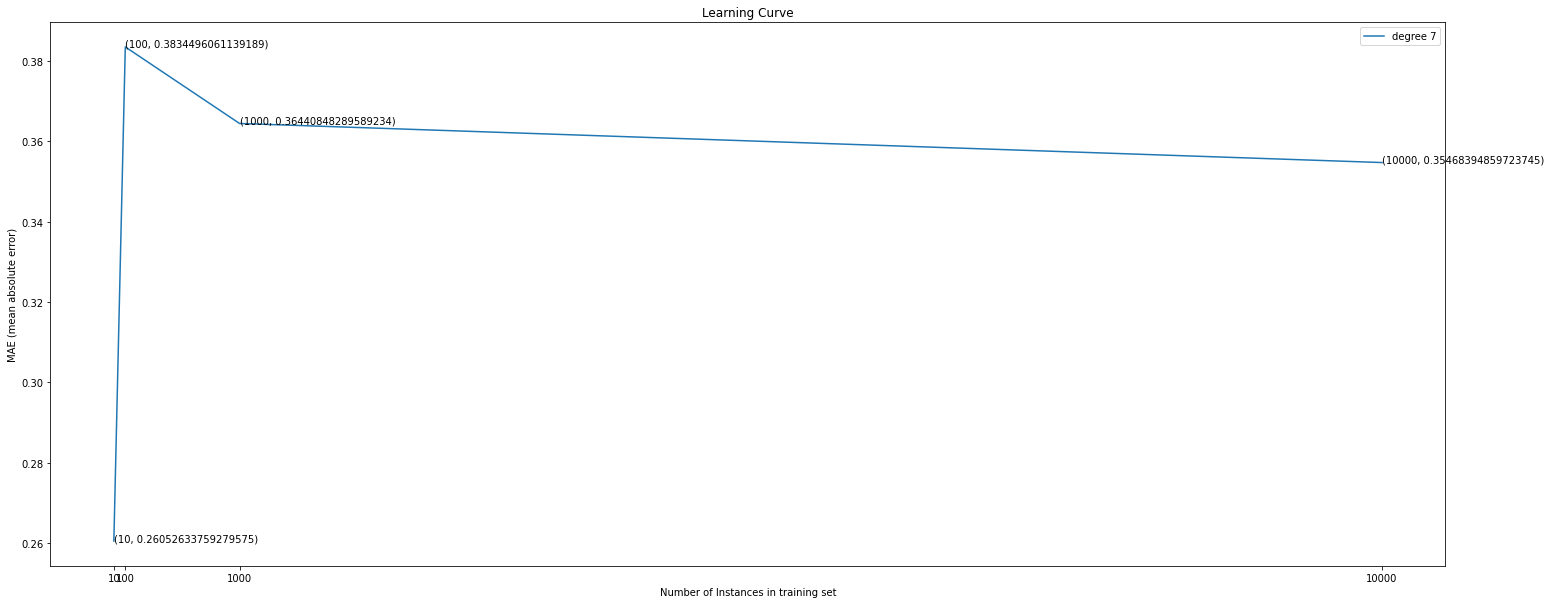

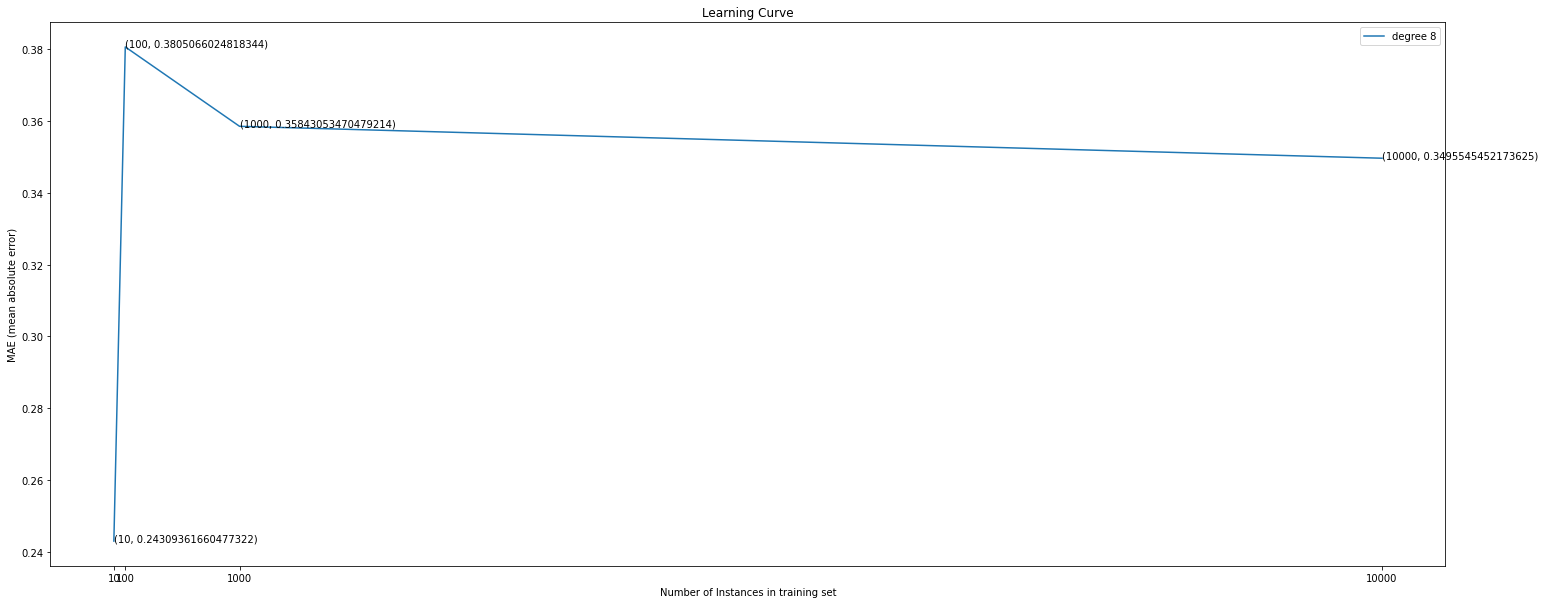

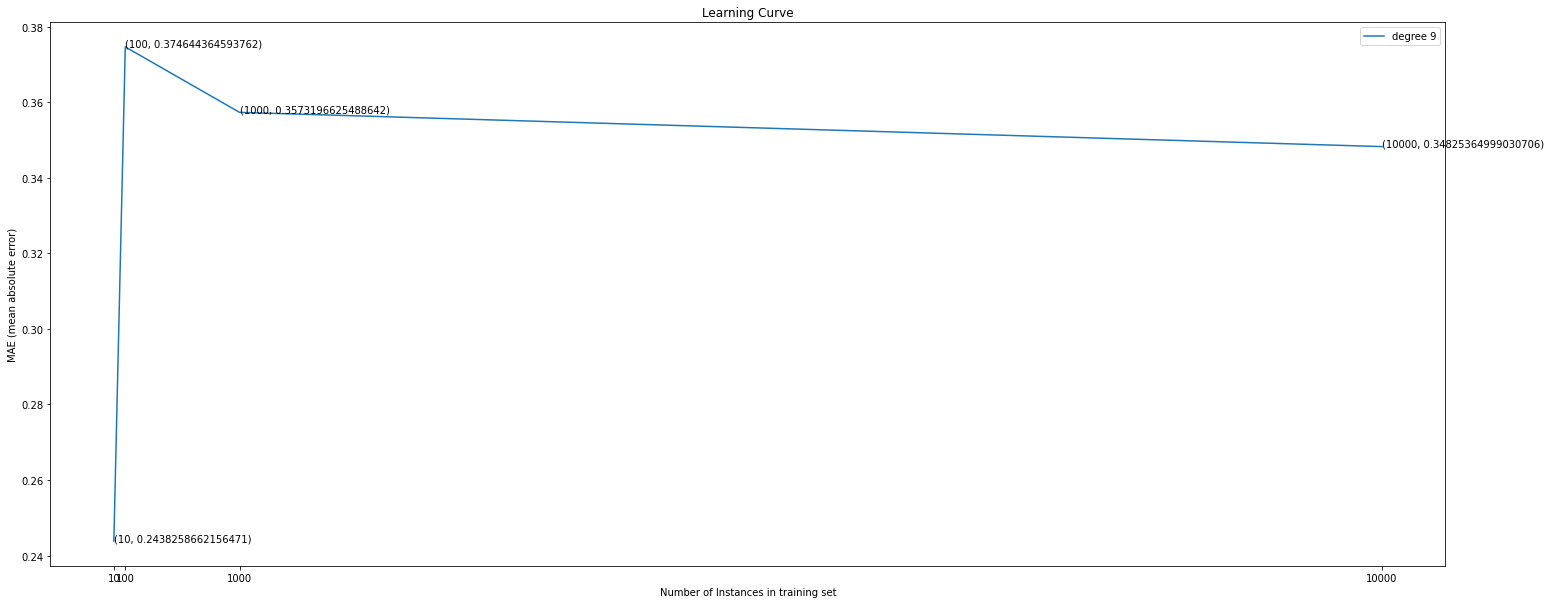

In [ ]:
# comparison of train error for each of the polynomial curve over different sizes of dataset

import matplotlib.pyplot as plt

numOfInstances = [10 ** i for i in range(1, 5)]
print(numOfInstances)
for i in range(9):
  fig, ax = plt.subplots()
  fig.set_size_inches(25, 10)
  temp = []
  temp.append(training_MAE_10[i])
  temp.append(training_MAE_100[i])
  temp.append(training_MAE_1000[i])
  temp.append(training_MAE_10000[i])

  ax.set_xticks(numOfInstances)
  ax.set_xticklabels(str(i) for i in numOfInstances)
  ax.set_xlabel('Number of Instances in training set')
  ax.set_ylabel('MAE (mean absolute error)')
  ax.set_title('Learning Curve')
  pts = plt.plot(numOfInstances, temp, label = "degree " + str(i+1))
  ax.legend()
  for xy in zip(numOfInstances, temp):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
  
  plt.show()


[10, 100, 1000, 10000]


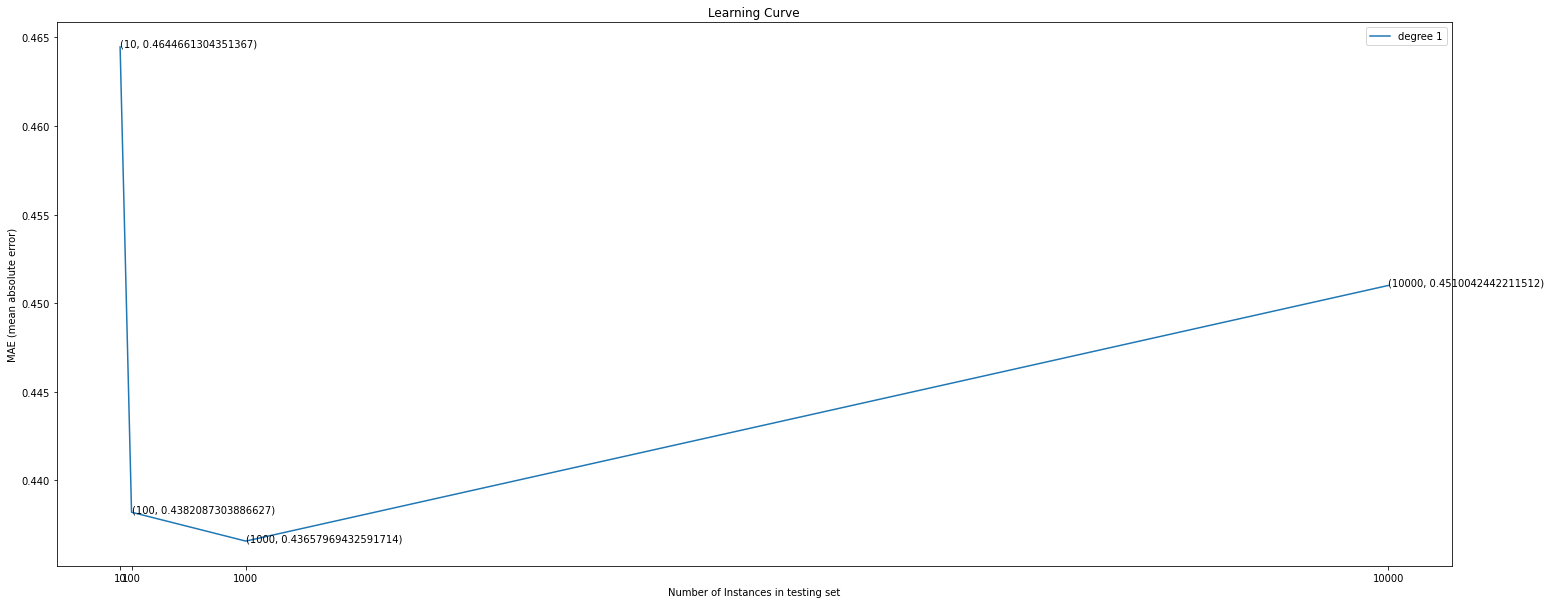

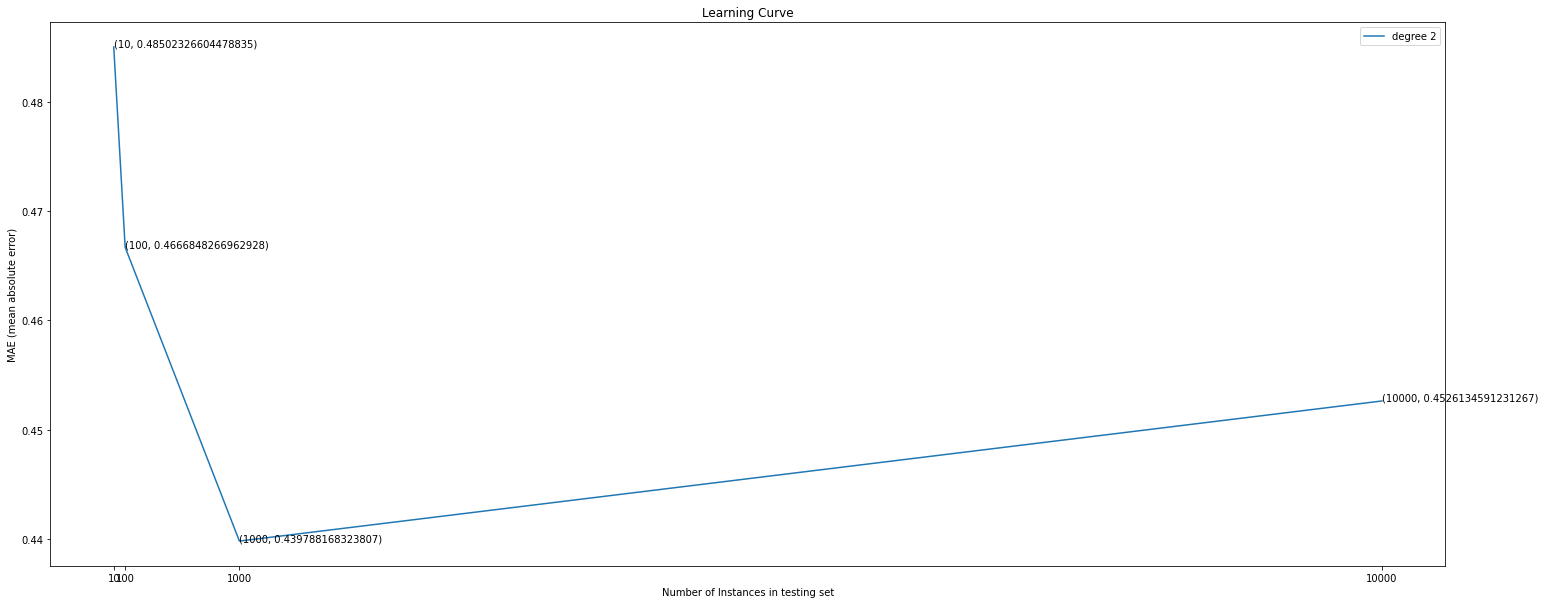

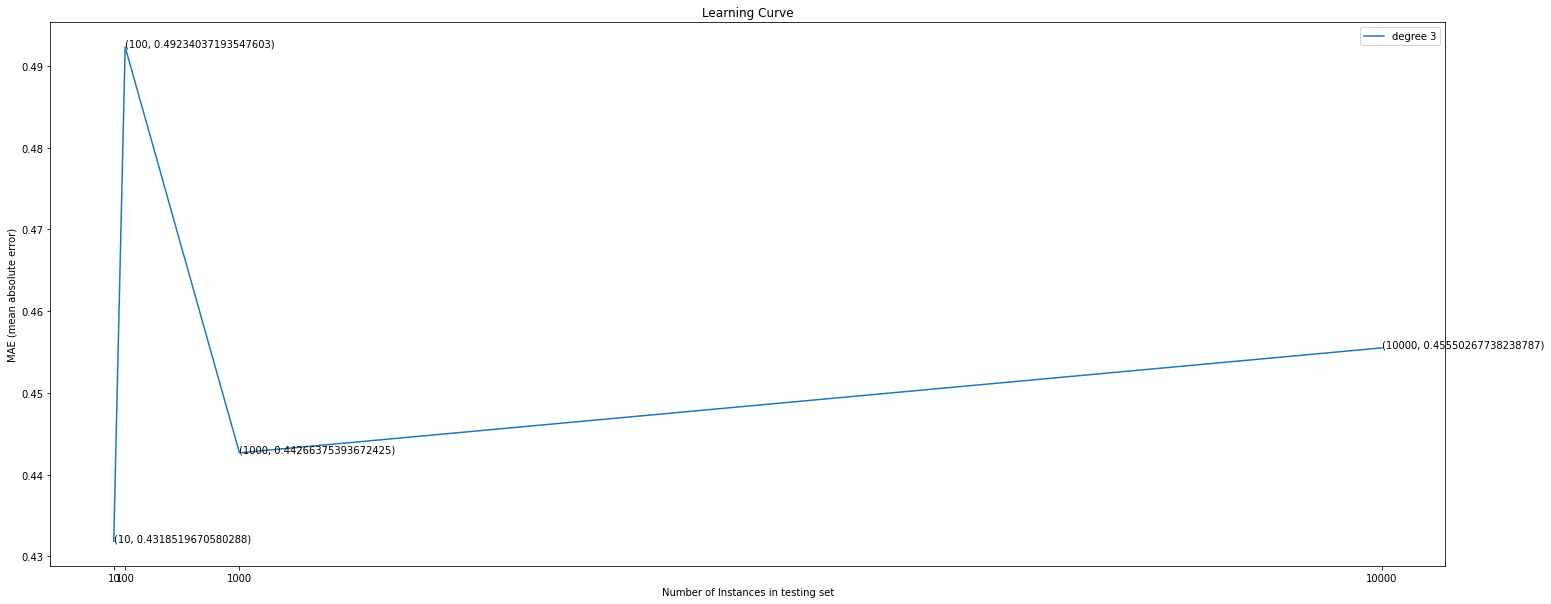

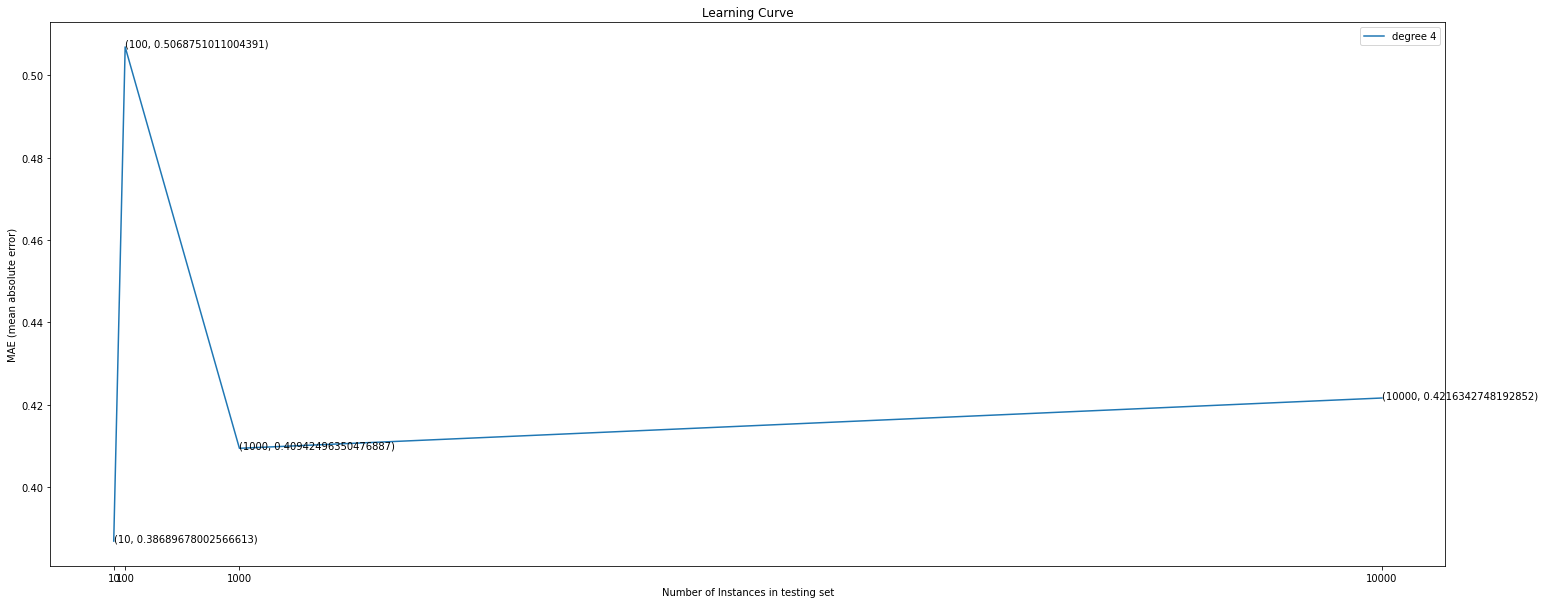

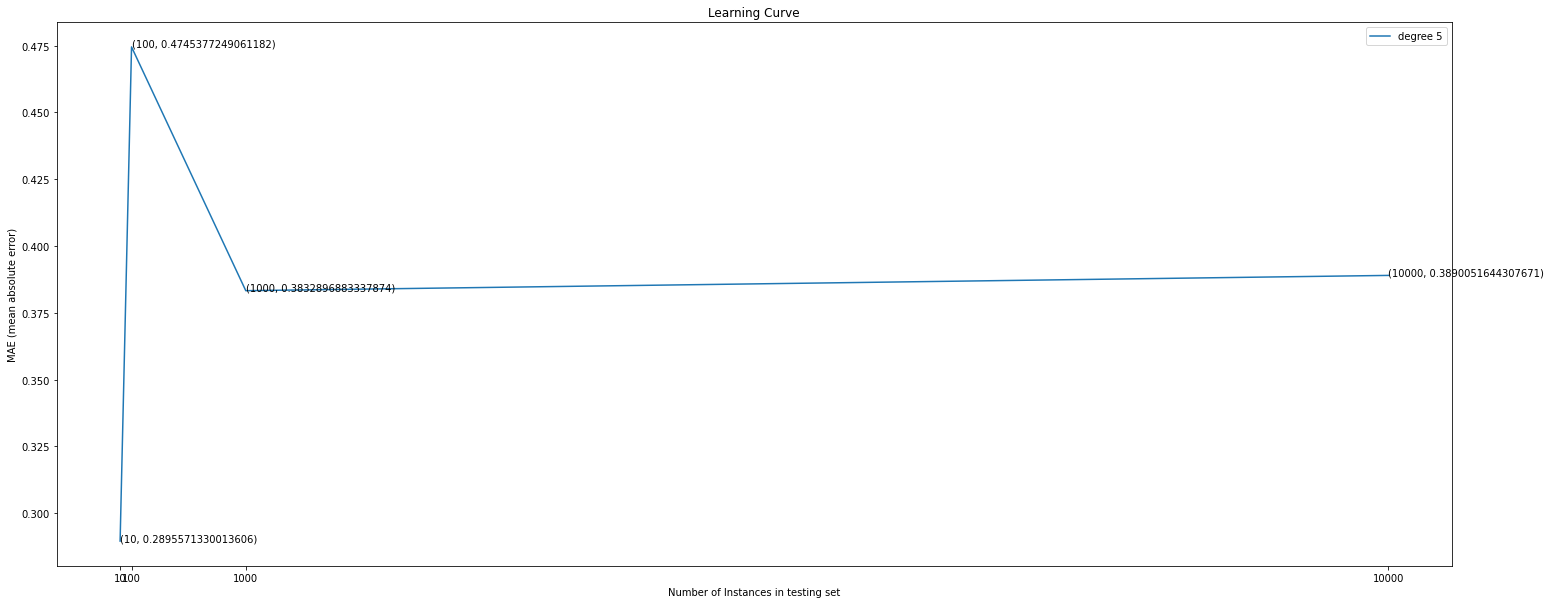

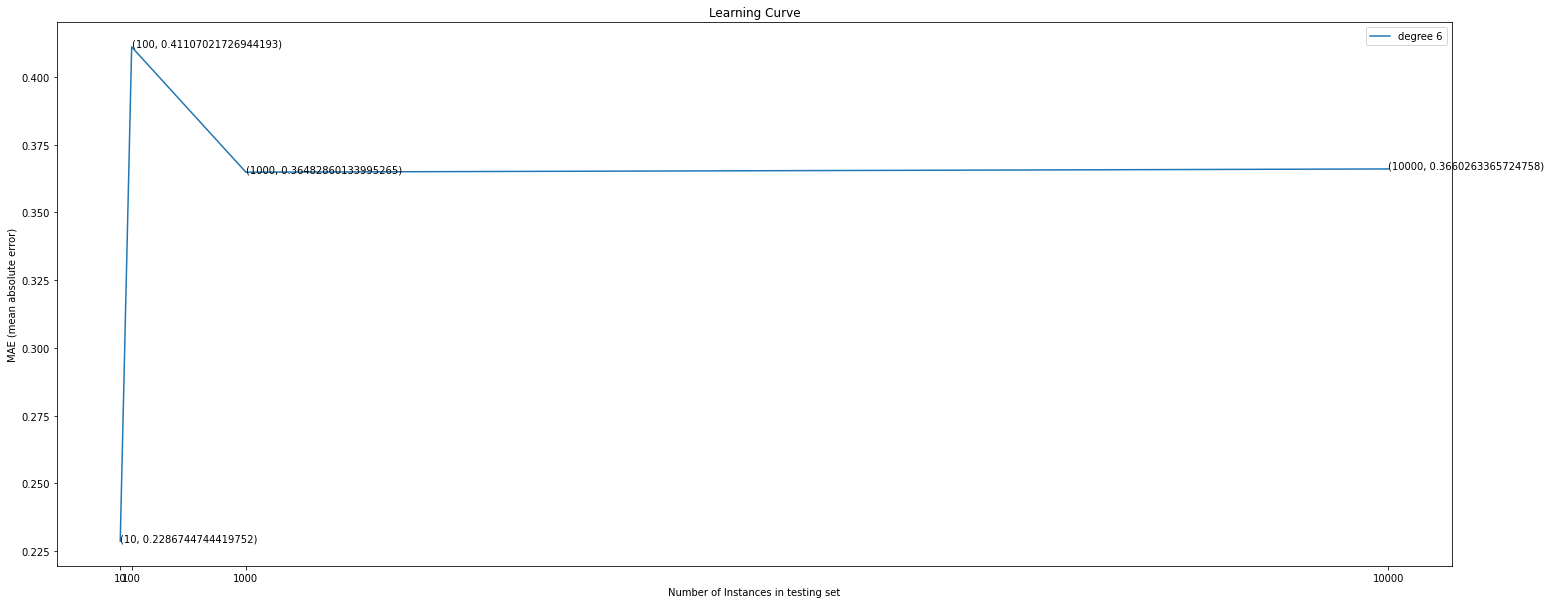

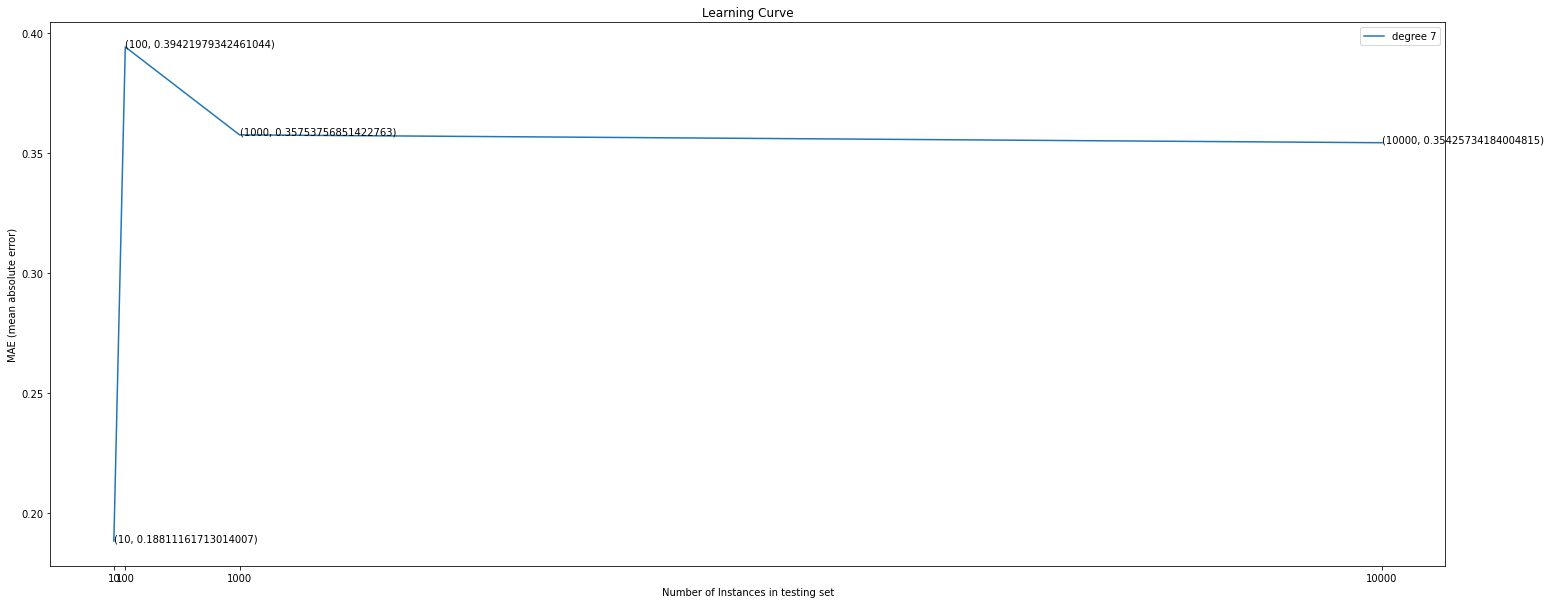

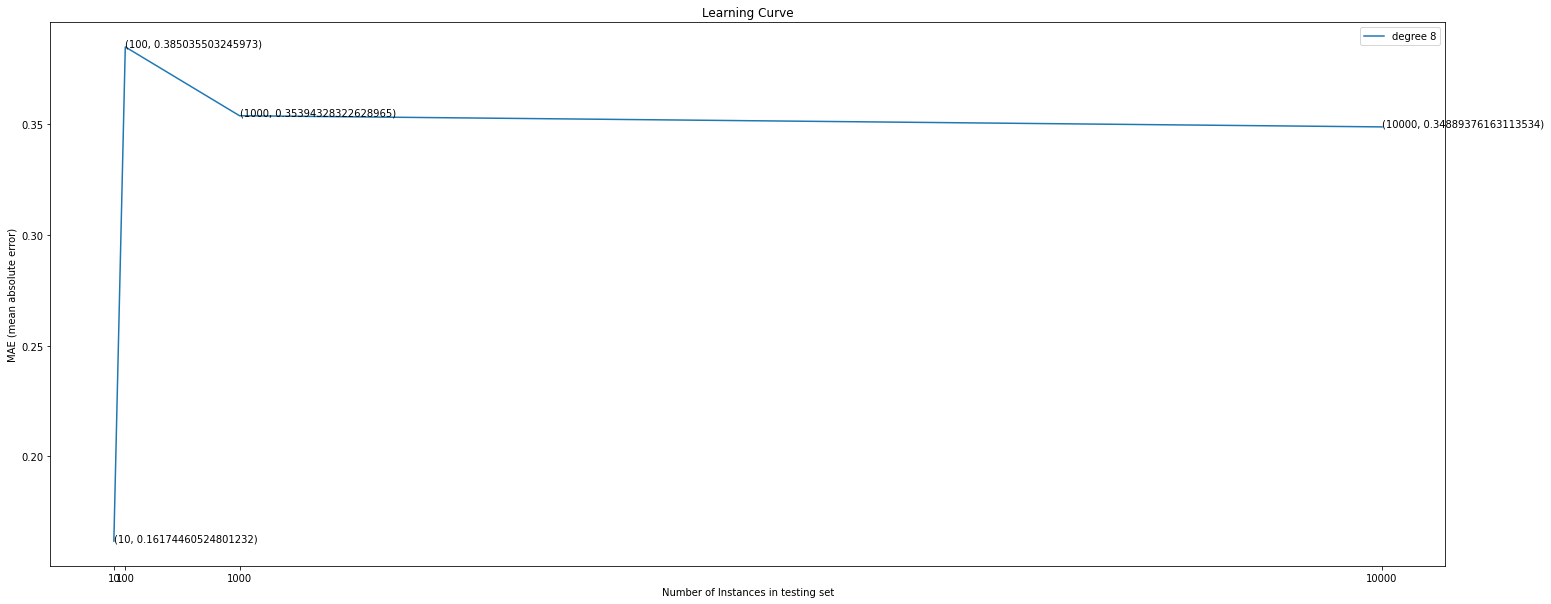

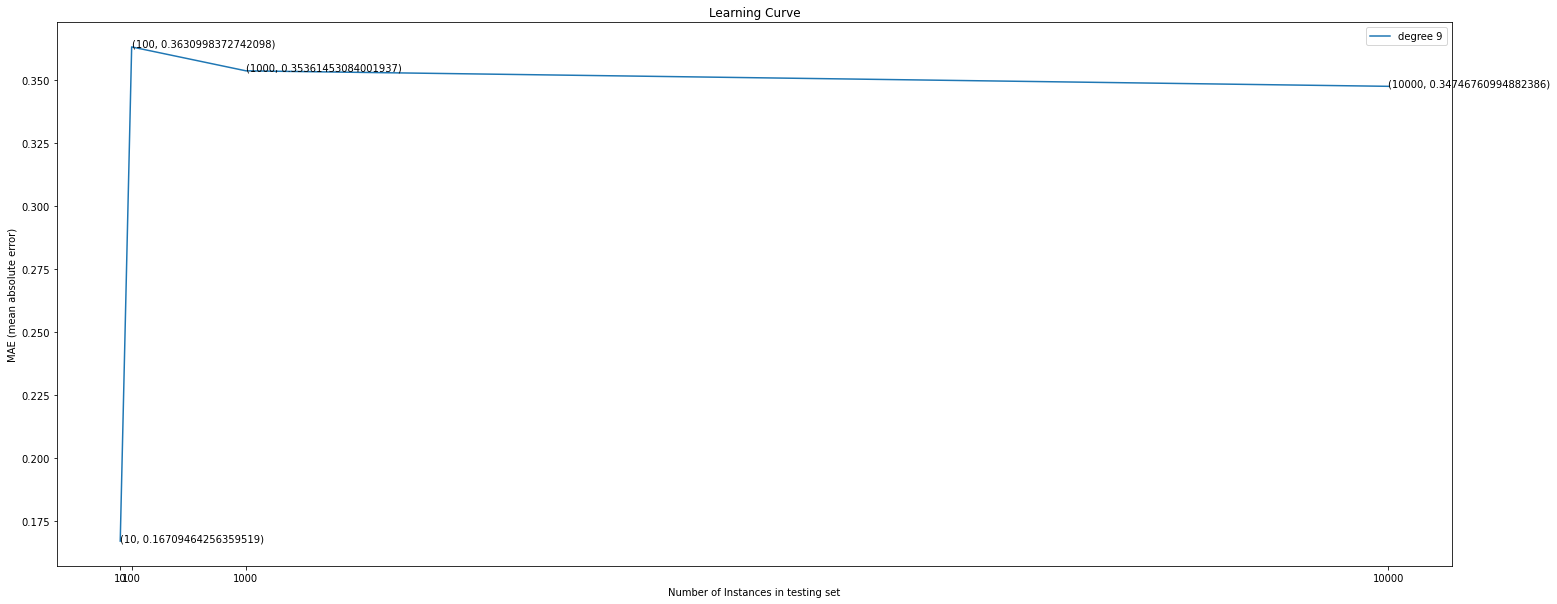

In [ ]:
# comparison of test error for each of the polynomial curve over different sizes of dataset

import matplotlib.pyplot as plt

numOfInstances = [10 ** i for i in range(1, 5)]
print(numOfInstances)
for i in range(9):
  fig, ax = plt.subplots()
  fig.set_size_inches(25, 10)
  temp = []
  temp.append(testing_MAE_10[i])
  temp.append(testing_MAE_100[i])
  temp.append(testing_MAE_1000[i])
  temp.append(testing_MAE_10000[i])

  ax.set_xticks(numOfInstances)
  ax.set_xticklabels(str(i) for i in numOfInstances)
  ax.set_xlabel('Number of Instances in testing set')
  ax.set_ylabel('MAE (mean absolute error)')
  ax.set_title('Learning Curve')
  pts = plt.plot(numOfInstances, temp, label = "degree " + str(i+1))
  ax.legend()
  for xy in zip(numOfInstances, temp):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
  
  plt.show()



# **Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

cancer = datasets.load_breast_cancer()

# producing a dataframe of the dataset
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['diagnosis']))
# printing the first five rows of Dataframe
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# analysis of data to select the best feature

sns.set(style="ticks", color_codes=True)
df1 = df[df.columns[:5]]
df1['diagnosis'] = df['diagnosis']
g = sns.pairplot(df1, palette = ('b', 'r'), hue="diagnosis", height=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In the above data visualization, we plotted the pairplots of all 5 features. The same can be done for all 30 features for a extensive analysis. The pair plots give a fair idea about which features are providing a linear classification, rather than a non-linear or random classification. This is neccesary for feature selection since we are considering a linear classification for logisitic regression and feature which adhere to that will be considered. Also, the pair plots give a good idea about correlation between features which can be used to identify redundant features and eliminate them, thus reducing number of features to consider in computation while training.

In [ ]:
# getting the correlation matrix of the features to get an idea about linear correlation bewteen features
# this will help to identify redundant features and eliminate them and only consider the base non redundant features

df[df.columns[:30]].corr(method='pearson')

# now we will reject the features with high correlation ( abs(correlation) > 0.9) and accept only those with lower mean (select the one with the lower mean from the higher correlated features)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


On the basis of the above two feature filtering, we filter out the below 10 features:
**Perimeter**,
**Area**,
 **Concave_points**,
 **Perimeter_SE**,
 **Area_SE**,
**W_Radius**,
**W_Texture**,
**W_Perimeter**,
 **W_Area,**
 **W_Concave_points**

In [ ]:
# Creating a new dataframe without the filtered out features (redundant and non-linear classification adhereing features)

df_features_dropped = df.drop(df[['mean perimeter',
 'mean area',
 'mean concave points',
 'perimeter error',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst concave points']], axis = 1)

df_features_dropped.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,0.0
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,0.0
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,0.0
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,0.0
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,0.0


In [ ]:
# now after data visualisation, we perform logistic regression training.
# define the logistic regression, gradient descent and other associated functions

def logisticFunc(z):
  l = (1. / (1. + np.exp(-z)))
  return l

def linearEqn(parameters, val):
  sum = parameters[0]
  for i in range(len(val)):
    sum += parameters[i+1] * val[i]
  
  return sum

def getClass(prob):
  if (prob >= 0.5): return 1
  else: return 0

def numOfMisclassification(parameters, trainingSet):
  sum = 0
  for i in range(len(trainingSet)):
    z = linearEqn(parameters, trainingSet[i][:-1])
    classLvl = getClass(logisticFunc(z))
    if (trainingSet[i][-1] != classLvl): sum += 1
  
  return sum


def gradientDescent(trainingSet, parameters, learning_rate):
  temp = []
  no_change_misclass_count = 0
  prev, curr = 0, 0
  iteration = 0
  while (True):
    for i in range(len(parameters)):
      if (i):
        sum = 0
        for j in range(len(trainingSet)):
          z = linearEqn(parameters, trainingSet[j][:-1])
          sum += (logisticFunc(z) - trainingSet[j][-1])
          sum *= trainingSet[j][i-1]
        sum /= len(trainingSet)
        sum *= learning_rate
        temp.append(sum)
      else:
        sum = 0
        for j in range(len(trainingSet)):
          z = linearEqn(parameters, trainingSet[j][:-1])
          sum += (logisticFunc(z) - trainingSet[j][-1])
        sum /= len(trainingSet)
        sum *= learning_rate
        temp.append(sum)
    
    for i in range(len(parameters)):
      parameters[i] -= temp[i]

    curr = numOfMisclassification(parameters, trainingSet)
    #print('\nTotal number of missclassifications:')
    #print(curr)
    if (curr == prev): no_change_misclass_count += 1
    if (curr != prev): no_change_misclass_count = 0
    prev = curr
    if (no_change_misclass_count > 1000):
      break


In [ ]:
# dividing the datset into training and testing set
import random 

dataset = df_features_dropped.values.tolist()
trainingSet, testSet = [], []

percent = [i / 10 for i in range(1, 7)]
index = [i for i in range(len(dataset))]
learning_rate = 0.05
final_table = []
print("Start")

for val in percent:
  parameters = [0] * (len(dataset[0]))
  temp = random.sample(index, int(val * len(dataset)))
  trainingSet = [dataset[i] for i in temp]
  testSet = [dataset[i] for i in list(set(index) - set(temp))]

  print('\n\nTraining for %d percent dataset\n\n' %(val * 100))

  gradientDescent(trainingSet, parameters, learning_rate)

  print('\naccuracy on training set:')
  num1 = numOfMisclassification(parameters, trainingSet)
  print(num1 /len(trainingSet) * 100)

  print('\naccuracy on test set:')
  num2 = numOfMisclassification(parameters, testSet)
  print(num2 /len(testSet) * 100)

  final_table.append([num1/len(trainingSet) * 100, num2/len(testSet) * 100])

print('Finish')

Start


Training for 10 percent dataset




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """



accuracy on training set:
64.28571428571429

accuracy on test set:
62.57309941520468


Training for 20 percent dataset



accuracy on training set:
66.3716814159292

accuracy on test set:
61.8421052631579


Training for 30 percent dataset



accuracy on training set:
36.470588235294116

accuracy on test set:
37.59398496240601


Training for 40 percent dataset



accuracy on training set:
64.31718061674009

accuracy on test set:
61.69590643274854


Training for 50 percent dataset




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars



accuracy on training set:
38.38028169014084

accuracy on test set:
36.140350877192986


Training for 60 percent dataset



accuracy on training set:
65.6891495601173

accuracy on test set:
58.333333333333336
Finish


In [ ]:
table = pd.DataFrame(final_table, columns=['Training Accuracy', 'Testing Accuracy'], index=['10%', '20%', '30%', '40%', '50%', '60%'])
table.head(6)

,Training Accuracy,Testing Accuracy
10%,64.285714,62.573099
20%,66.371681,61.842105
30%,36.470588,37.593985
40%,64.317181,61.695906
50%,38.380282,36.140351
60%,65.689150,58.333333
